# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The sample is right skewed, so the standard deviation is relatively large. In this case, the median is a more representative measure of central tendency for the data.

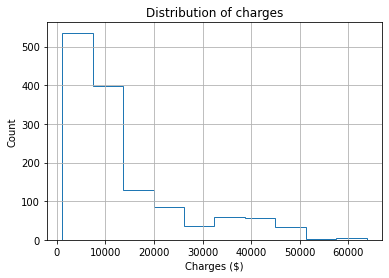

In [34]:
_ = medical['charges'].hist(histtype='step', bins=10)
_ = plt.xlabel('Charges ($)')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of charges')

In [14]:
charges_mean = medical['charges'].mean()
charges_std = medical['charges'].std()

print(f"The mean of medical charges is: ${charges_mean:.2f}")
print(f"The sample standard  deviation of medical charges is: ${charges_std:.2f}")

The mean of medical charges is: $13270.42
The sample standard  deviation of medical charges is: $12110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Given that the data represents a random sample of the charges, and that its sample size is large (1338), the available statistical tools will be able to provide a reliable estimate of the true population mean of the charges, not even requiring to invoke the CLT.

Ideally, we will estimate the population mean from our sample statistic, and then calculate its confidence interval at a 95% level. Finally, we need to check if this range's lower limit is larger than \\$12k.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one sided 95% confidence seems appropriate given the sample size and one-time p-value calculation method (that we are about to perform), i.e.:

What is the probability of observing a $12k or lower mean charge given the data?

In [39]:
sample_size = medical['charges'].shape[0]
df = sample_size - 1
t_score = t.ppf(0.05, df=df)

In [53]:
t_margin_of_error_95 = t_score * (charges_std / np.sqrt(sample_size))
print(f'The margin of error for a 95% confidence is: ${t_margin_of_error_95:.2f}')

t_ci_95 = [charges_mean + t_margin_of_error_95, np.Inf]
t_l, t_h = t_ci_95
print(f'The confidence interval is: $({t_l:.2f}, {t_h:.2f})')

The margin of error for a 95% confidence is: $-544.94
The confidence interval is: $(12725.49, inf)


The administration should not be concerned since the possible mean of the true population is larger than 12725\\$, with a 95\% confidence, which is larger than the \\$12k concern limit.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
- H0: There is no difference between the mean of charges for people with insurance compared to people without insurance ($\mu_{diff} = 0$).
- Ha: There is a difference between the mean of charges for people with insurance compared to people without insurance ($\mu_{diff} \neq 0$)

We are assuming that the variance for the two groups (insured and uninsured) is the same.

In [54]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [60]:
insured_cond = medical['insuranceclaim'] == 1

In [61]:
insured = medical.loc[insured_cond, 'charges']
uninsured = medical.loc[~insured_cond, 'charges']

In [73]:
n0 = len(insured)
n1 = len(uninsured)

print(f"The are {n0} insured charges")
print(f"The are {n1} uninsured charges")

The are 783 insured charges
The are 555 uninsured charges


In [67]:
mean_insured = insured.mean()
mean_uninsured = uninsured.mean()
mean_diff = mean_insured - mean_uninsured

print(f"The mean charge for the insured is: ${mean_insured:.2f}")
print(f"The mean charge for the uninsured is: ${mean_uninsured:.2f}")
print(f"The mean difference between insured and uninsured is: ${mean_diff:.2f}")

The mean charge for the insured is: $16423.93
The mean charge for the uninsured is: $8821.42
The mean difference between insured and uninsured is: $7602.51


In [76]:
std_insured = insured.std()
std_uninsured = uninsured.std()

print(f"The standard deviation for insured charges is: ${std_insured:.2f}")
print(f"The standard deviation for uninsured charges is: ${std_uninsured:.2f}")

The standard deviation for insured charges is: $14045.93
The standard deviation for uninsured charges is: $6446.51


In [78]:
s_pooled = np.sqrt(((n0-1)*(std_insured**2) + (n1-1)*(std_uninsured**2)) / (n0 + n1 - 2))

print(f"The pooled standard deviation is: ${s_pooled:.2f}")

The pooled standard deviation is: $11520.03


In [85]:
ts = (mean_insured - mean_uninsured) / (s_pooled * np.sqrt((1/n0) + (1/n1)))

print(f"The t-statistic is: {ts:.2f}")

The t-statistic is: 11.89


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [100]:
p_manual = t.sf(np.abs(ts), (n0 + n1 - 2))*2

print(f"The p-value is {p_manual}, thus we reject H0:")
print(f"The mean insured charges are different than the mean uninsured charges")
print(f"with a 95% confidence.")

The p-value is 4.461230231620972e-31, thus we reject H0:
The mean insured charges are different than the mean uninsured charges
with a 95% confidence.


In [93]:
import scipy

In [98]:
t_s_scipy, p_scipy = scipy.stats.ttest_ind(insured, uninsured)

print(f"The t-statistic is {t_s_scipy}.")
print(f"The p-value is {p_scipy}.")
print(f"These values are the same as those calculate with the formulas.")

The t-statistic is 11.893299030876712.
The p-value is 4.461230231620717e-31.
These values are the same as those calculate with the formulas.


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The z-test calculation needs knowledge of the true population parameter, so if a z-test function existed it would require the entire population, and not just a sample from it. Alternatively, it could be coded from a sample where the sample size is larger than 30, and the true population parameter is given.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test